# Install Libraries

In [ ]:
!pip install pandas numpy scikit-learn tensorflow matplotlib openpyxl


# Import Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt


# Load the Dataset

In [30]:
# Load the dataset
file_path = r"C:\Users\Hp\OneDrive\Documents\UNI\ML\urdu punjabi merged Dataset.xlsx"
data = pd.read_excel(file_path)

# Display the first 5 rows of the dataset
data.head()


,Lemma,Word
0,علمبردار,علمبرداردے
1,چکھوا,چکھوادی
2,چھیڑوا,چھیڑواوئیے
3,نپا,نپاندی
4,پشاوریت,پشاوریتو


# Preprocess the Data

In [28]:
# Extract input (words) and target (lemmas)
X = data['Word']
y = data['Lemma']

# Encode the target labels (lemmas)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize the input words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)

# Pad sequences to make them the same length
max_len = max(len(seq) for seq in X_tokenized)  # Find max sequence length
X_padded = pad_sequences(X_tokenized, maxlen=max_len, padding='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Vocabulary size (add 1 for padding token)
vocab_size = len(tokenizer.word_index) + 1

print("Vocabulary Size:", vocab_size)
print("Max Sequence Length:", max_len)


Vocabulary Size: 92076
Max Sequence Length: 1


# Build the Model

In [5]:
# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),  # Embedding layer without input_length
    LSTM(64, return_sequences=False),  # LSTM layer
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [6]:
# Train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)


Epoch 1/10
2802/2802 ━━━━━━━━━━━━━━━━━━━━ 491s 174ms/step - accuracy: 3.8805e-04 - loss: 9.1520 - val_accuracy: 0.0017 - val_loss: 8.8143
Epoch 2/10
2802/2802 ━━━━━━━━━━━━━━━━━━━━ 477s 170ms/step - accuracy: 0.0047 - loss: 8.0852 - val_accuracy: 0.0181 - val_loss: 8.7524
Epoch 3/10
2802/2802 ━━━━━━━━━━━━━━━━━━━━ 479s 171ms/step - accuracy: 0.0734 - loss: 6.4600 - val_accuracy: 0.0886 - val_loss: 8.8451
Epoch 4/10
2802/2802 ━━━━━━━━━━━━━━━━━━━━ 787s 281ms/step - accuracy: 0.3329 - loss: 4.2867 - val_accuracy: 0.1363 - val_loss: 9.3323
Epoch 5/10
2802/2802 ━━━━━━━━━━━━━━━━━━━━ 527s 188ms/step - accuracy: 0.5477 - loss: 2.9352 - val_accuracy: 0.1618 - val_loss: 10.1054
Epoch 6/10
2802/2802 ━━━━━━━━━━━━━━━━━━━━ 520s 186ms/step - accuracy: 0.6698 - loss: 2.1779 - val_accuracy: 0.1745 - val_loss: 10.9566
Epoch 7/10
2802/2802 ━━━━━━━━━━━━━━━━━━━━ 539s 192ms/step - accuracy: 0.7306 - loss: 1.7362 - val_accuracy: 0.1834 - val_loss: 11.8082
Epoch 8/10
2802/2802 ━━━━━━━━━━━━━━━━━━━━ 8544s 3s/step

# Evaluate the Model
Check the performance of the model on the test set.

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


701/701 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1956 - loss: 13.4662
Test Loss: 13.542635917663574
Test Accuracy: 0.19798357784748077


# Visualize Training Progress

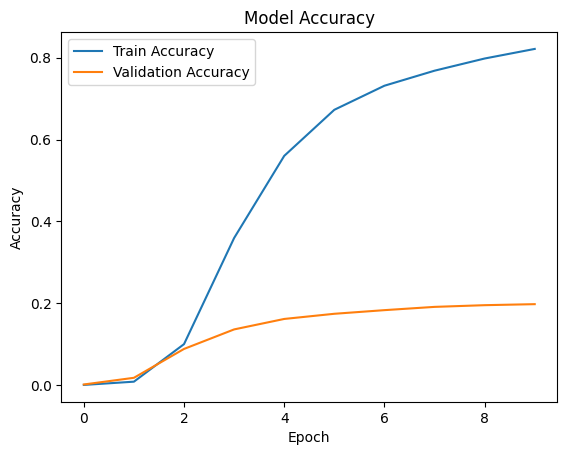

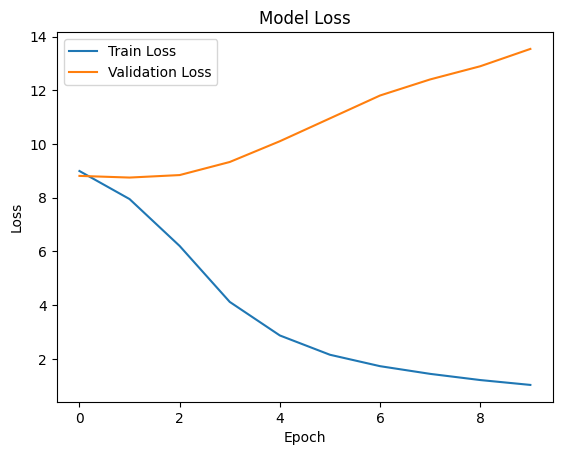

In [8]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Predict Lemmas

In [19]:
# Function to predict lemma for a given word
def predict_lemma(word):
    seq = tokenizer.texts_to_sequences([word])
    padded_seq = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(padded_seq)
    pred_label = np.argmax(pred)
    return label_encoder.inverse_transform([pred_label])[0]

# Test the function with a sample word
sample_word = "تقریبی"  # Replace with any word
predicted_lemma = predict_lemma(sample_word)
print(f"Predicted Lemma for '{sample_word}': {predicted_lemma}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Lemma for 'تقریبی': تقریب


In [24]:
# Function to predict lemma for a given word
def predict_lemma(word):
    seq = tokenizer.texts_to_sequences([word])  # Convert the word into a sequence
    padded_seq = pad_sequences(seq, maxlen=max_len, padding='post')  # Pad the sequence to match the max length
    pred = model.predict(padded_seq)  # Get the model's predictions
    pred_label = np.argmax(pred)  # Get the label index with the highest probability
    return label_encoder.inverse_transform([pred_label])[0]  # Convert label back to lemma

# Test the function with 5 example words
example_words = ["دوڑتا", "سنبھالے", "رسمے", "کتابیں", "علمبرداردے", ]  # Replace with other words if needed

# Predict lemmas for each word
for word in example_words:
    predicted_lemma = predict_lemma(word)
    print(f"Predicted Lemma for '{word}': {predicted_lemma}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Lemma for 'دوڑتا': دوڑ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Lemma for 'سنبھالے': سنبھال
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Lemma for 'رسمے': رسم
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Lemma for 'کتابیں': کتاب
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Lemma for 'علمبرداردے': علمبردار


# Save and Reload the Model

In [13]:
# Save the model without the optimizer (optional, for inference-only)
model.save("urdu_punjabi_lemmatizer.keras", include_optimizer=False)

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model("urdu_punjabi_lemmatizer.keras")

# Recompile the model with a fresh optimizer if retraining or evaluating
loaded_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Model loaded and recompiled successfully!")


Model loaded and recompiled successfully!


# Test Reloaded Model

In [25]:
# Use the reloaded model to predict a lemma
sample_word = "دوڑاں"
padded_seq = pad_sequences(tokenizer.texts_to_sequences([sample_word]), maxlen=max_len, padding='post')
pred = loaded_model.predict(padded_seq)
predicted_lemma = label_encoder.inverse_transform([np.argmax(pred)])[0]
print(f"Predicted Lemma for '{sample_word}': {predicted_lemma}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Predicted Lemma for 'دوڑاں': دوڑ
